# Purpose

Equity computations, Gini Coefficient, Lorenz curve, and Weighted Average Accessibility by group for SF


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go

In [9]:
# Load in the accessibility results
filepath = '/Users/askalila/Documents/GitHub/32_wri_numo/data/San Francisco/level_i_ii/accessibility_results.geojson'
access = gpd.read_file(filepath)

# Load population files
filepath2 = '/Users/askalila/Documents/GitHub/32_wri_numo/data/San Francisco/level_i_ii/zones_w_micromobility_providers.geojson'
zones = gpd.read_file(filepath2)

total_jobs= zones.C000.sum()

In [5]:
# ensure the array of accessibility values is sorted from lowest to highest values first!
access_pt = np.sort(list(access.jobs_tt_pt_60))
access_pt_docked = np.sort(list(access.jobs_tt_docked_service_60))
access_pt_dockless = np.sort(list(access.jobs_tt_dockless_service_60))
access_pt_bestMM = np.sort(list(access.jobs_tt_docked_dockless_best_60))


In [6]:

def gini(arr):
    count = arr.size
    coefficient = 2. / count
    indexes = np.arange(1., count + 1)
    weighted_sum = np.nansum(indexes * arr)
    total = np.nansum(arr)
    constant = (count + 1.) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = np.nancumsum(arr) / np.nansum(arr) *100
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)


In [7]:
# show the gini index for PT 
print('Gini Index with only Public Transport: \t\t',np.round(gini(access_pt),4))
print('Gini Index with Public Transport + docked MM:\t',np.round(gini(access_pt_docked),4))
print('Gini Index with Public Transport + dockless MM:\t',np.round(gini(access_pt_dockless),4))
print('Gini Index with Public Transport + best MM:\t',np.round(gini(access_pt_bestMM),4))

Gini Index with only Public Transport: 		 0.6449
Gini Index with Public Transport + docked MM:	 0.6167
Gini Index with Public Transport + dockless MM:	 0.5894
Gini Index with Public Transport + best MM:	 0.5802


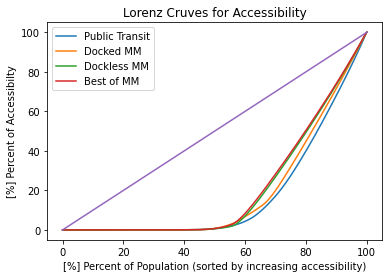

In [77]:
lorenz_curve_pt = lorenz(access_pt)
lorenz_curve_pt_docked = lorenz(access_pt_docked)
lorenz_curve_pt_docless = lorenz(access_pt_dockless)
lorenz_curve_pt_2 = lorenz(access_pt_bestMM)


# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 100, lorenz_curve_pt.size), lorenz_curve_pt, label = "Public Transit")
plt.plot(np.linspace(0.0, 100, lorenz_curve_pt_docked.size), lorenz_curve_pt_docked, label = "Docked MM")
plt.plot(np.linspace(0.0, 100, lorenz_curve_pt_docless.size), lorenz_curve_pt_docless, label = "Dockless MM")
plt.plot(np.linspace(0.0, 100, lorenz_curve_pt_2.size), lorenz_curve_pt_2, label = "Best of MM")
plt.legend(loc="upper left")
# plot the straight line perfect equality curve

plt.plot([0,100], [0,100])
plt.title("Lorenz Cruves for Accessibility")
plt.xlabel("[%] Percent of Population (sorted by increasing accessibility)")
plt.ylabel("[%] Percent of Accessibilty")

plt.savefig('Lorenz_curve_SF.png')
plt.show()


## Improvement 
in number of jobs or % of all jobs reached?
        number of jobs would be easier to interpret

In [10]:
access['jobs_tt_improve_dock_dockless_pt_60'] = access['jobs_tt_improve_dock_dockless_pt_60']*total_jobs/100
access['jobs_tt_pt_60'] = access['jobs_tt_pt_60']*total_jobs/100
access['jobs_tt_docked_dockless_best_60'] = access['jobs_tt_docked_dockless_best_60']*total_jobs/100



array([[<AxesSubplot:title={'center':'jobs_tt_improve_dock_dockless_pt_60'}>]],
      dtype=object)

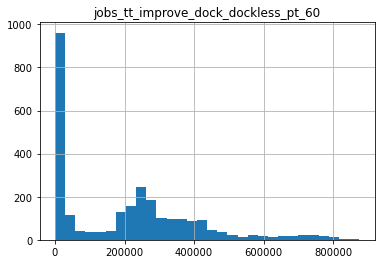

In [11]:
access[access.jobs_tt_improve_dock_dockless_pt_60 > 0].hist(column='jobs_tt_improve_dock_dockless_pt_60', bins = 30)

In [1]:


fig = px.choropleth(access,  
                    geojson=access.geometry,
                    locations=access.index,
                    color='improv_ptdockless_on_pt'
                    ,color_continuous_scale="Reds"
                    #,range_color=(0, 12) 
                    #,labels={'unemp':'unemployment rate'}
                          )
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

NameError: name 'px' is not defined

In [15]:
# how many have negative improvement? Can those be explained?
access[access.improv_ptdockless_on_pt<0]

# Zero now that Hussein fixed it

,cell_id,jobs_tt_docked_service_15,jobs_tt_dockless_service_15,jobs_tt_docked_dockless_best_15,jobs_tt_car_15,jobs_tt_car_freeflow_15,jobs_tt_car_parking_15,jobs_tt_car_parking_freeflow_15,jobs_tt_car_parking_acc_egr_15,jobs_tt_car_parking_acc_egr_freeflow_15,...,jobs_tt_improve_dock_dockless_pt_60,jobs_tt_improve_docked_pt_perc_60,jobs_tt_improve_dockless_pt_perc_60,jobs_tt_improve_dock_dockless_pt_perc_60,jobs_tt_improve_dockless_pt_60_const,jobs_tt_improve_dockless_pt_45_const,jobs_tt_improve_dockless_pt_30_const,jobs_tt_improve_dockless_pt_15_const,geometry,improv_ptdockless_on_pt


#### Total improvement jobs*person

In [64]:
# Calculate Improvement by population group 
improvement = access[['cell_id','improv_MM_on_pt', 'jobs_tt_docked_dockless_best_60', 'jobs_tt_pt_60']]
zones_short = zones[['cell_id', 'pop_totalE', 'pop_whiteE', 'pop_blackE',
       'pop_american_indianE', 'pop_asianE', 'pop_hawaiianE',
       'pop_other_raceE', 'pop_other_two_racesE']]

improvement = pd.merge(improvement, zones_short, on='cell_id',how='inner')


In [65]:
pop_groups =['pop_totalE', 'pop_whiteE', 'pop_blackE',
       'pop_american_indianE', 'pop_asianE', 'pop_hawaiianE',
       'pop_other_raceE', 'pop_other_two_racesE']

pop_improvements = dict()

for group in pop_groups:
    product = improvement.improv_MM_on_pt*improvement[group]
    group_improv = product.sum()
    pop_improvements[group] = group_improv
    print(f'Total {group} improvement:\t\t {group_improv}')

Total pop_totalE improvement:		 217282067409.0
Total pop_whiteE improvement:		 91286072218.0
Total pop_blackE improvement:		 25844009298.0
Total pop_american_indianE improvement:		 1485866531.0
Total pop_asianE improvement:		 58648702829.0
Total pop_hawaiianE improvement:		 1001019746.0
Total pop_other_raceE improvement:		 24831064898.0
Total pop_other_two_racesE improvement:		 14102535985.0


In [78]:
# Group improvement as percent of total improvement

for group in pop_groups:
    percent = np.round(pop_improvements[group]/pop_improvements['pop_totalE']*100,1)
    print(f'{group} improvement percentage:\t\t {percent}%')

pop_totalE improvement percentage:		 100.0%
pop_whiteE improvement percentage:		 42.0%
pop_blackE improvement percentage:		 11.9%
pop_american_indianE improvement percentage:		 0.7%
pop_asianE improvement percentage:		 27.0%
pop_hawaiianE improvement percentage:		 0.5%
pop_other_raceE improvement percentage:		 11.4%
pop_other_two_racesE improvement percentage:		 6.5%


In [67]:
# What should the numbers compare to?
total_SF_pop = improvement.pop_totalE.sum()
for group in pop_groups:
    total_group_pop = improvement[group].sum()
    group_perc = np.round(total_group_pop/total_SF_pop*100,1)
    print(f'{group} population percentage:\t\t {group_perc}%')

pop_totalE population percentage:		 100.0%
pop_whiteE population percentage:		 43.2%
pop_blackE population percentage:		 8.1%
pop_american_indianE population percentage:		 0.5%
pop_asianE population percentage:		 30.3%
pop_hawaiianE population percentage:		 0.8%
pop_other_raceE population percentage:		 10.9%
pop_other_two_racesE population percentage:		 6.1%


#### Average Improvement by person [jobs/person]


In [38]:
for group in pop_groups:
    for mode in ['avg_jobs_PT_', 'avg_jobs_MM_']:
        column_name = mode + group[4:-1]

        if 'PT' in mode: improvement[column_name] = improvement.jobs_tt_pt_60/improvement[group]
        if 'MM' in mode: improvement[column_name] = improvement.jobs_tt_docked_dockless_best_60/improvement[group]
        improvement[column_name] = improvement[column_name].replace({np.inf: 0})

In [39]:


for column in improvement.columns:
    if not column.startswith('avg_jobs'): continue
    avg_group_jobs =  np.round(improvement[column].mean())
    print(f'{column}:\t\t {avg_group_jobs} job/person')

avg_jobs_PT_total:		 359.0 job/person
avg_jobs_MM_total:		 583.0 job/person
avg_jobs_PT_white:		 1091.0 job/person
avg_jobs_MM_white:		 1681.0 job/person
avg_jobs_PT_black:		 15363.0 job/person
avg_jobs_MM_black:		 20483.0 job/person
avg_jobs_PT_american_indian:		 39372.0 job/person
avg_jobs_MM_american_indian:		 56827.0 job/person
avg_jobs_PT_asian:		 2347.0 job/person
avg_jobs_MM_asian:		 3977.0 job/person
avg_jobs_PT_hawaiian:		 32105.0 job/person
avg_jobs_MM_hawaiian:		 46294.0 job/person
avg_jobs_PT_other_race:		 14658.0 job/person
avg_jobs_MM_other_race:		 20505.0 job/person
avg_jobs_PT_other_two_races:		 9014.0 job/person
avg_jobs_MM_other_two_races:		 12644.0 job/person


### Income Group improvement

In [41]:
zones_income = zones[['cell_id', 'income_0.9999E',
       'income_10000.14999E', 'income_15000.29999E', 'income_20000.24999E',
       'income_25000.29999E', 'income_30000.34999E', 'income_35000.39999E',
       'income_40000.44999E', 'income_44000.49999E', 'income_50000.59999E',
       'income_60000.74999E', 'income_75000.99999E', 'income_100000.124999E',
       'income_125000.149999E', 'income_150000.199999E',
       'income_above.200000E']]

improvement = pd.merge(improvement, zones_income, on='cell_id',how='inner')


In [51]:
income_groups =['income_0.9999E',
       'income_10000.14999E', 'income_15000.29999E', 'income_20000.24999E',
       'income_25000.29999E', 'income_30000.34999E', 'income_35000.39999E',
       'income_40000.44999E', 'income_44000.49999E', 'income_50000.59999E',
       'income_60000.74999E', 'income_75000.99999E', 'income_100000.124999E',
       'income_125000.149999E', 'income_150000.199999E',
       'income_above.200000E']

# for the income total population only
improvement['income_all'] = improvement[income_groups].sum(axis=1)
product = improvement.improv_ptdockless_on_pt*improvement['income_all']
all_income_improv = product.sum()

total_income_pop = improvement.income_all.sum()

print(f'Income Grou \t\t\t\t\t Improvement  | Population  %')
for group in income_groups:
    product = improvement.improv_ptdockless_on_pt*improvement[group]
    group_improv = product.sum()
    percent = np.round(group_improv/all_income_improv*100,2)

    total_group_pop = improvement[group].sum()
    group_perc = np.round(total_group_pop/total_income_pop*100,1)

    print(f'{group} improvement percentage:\t\t {percent} \t| {group_perc}  %')


Income Grou 					 Improvement  | Population  %
income_0.9999E improvement percentage:		 5.43 	| 4.1  %
income_10000.14999E improvement percentage:		 5.0 	| 3.9  %
income_15000.29999E improvement percentage:		 3.33 	| 2.7  %
income_20000.24999E improvement percentage:		 3.42 	| 2.8  %
income_25000.29999E improvement percentage:		 2.99 	| 2.6  %
income_30000.34999E improvement percentage:		 3.11 	| 2.7  %
income_35000.39999E improvement percentage:		 2.6 	| 2.4  %
income_40000.44999E improvement percentage:		 2.79 	| 2.5  %
income_44000.49999E improvement percentage:		 2.71 	| 2.4  %
income_50000.59999E improvement percentage:		 5.23 	| 4.9  %
income_60000.74999E improvement percentage:		 7.17 	| 6.8  %
income_75000.99999E improvement percentage:		 10.58 	| 10.8  %
income_100000.124999E improvement percentage:		 8.84 	| 9.4  %
income_125000.149999E improvement percentage:		 7.12 	| 7.7  %
income_150000.199999E improvement percentage:		 10.7 	| 11.8  %
income_above.200000E improvement per

In [45]:
# What should the numbers compare to?

for group in income_groups:
    total_group_pop = improvement[group].sum()
    group_perc = np.round(total_group_pop/total_income_pop*100,1)
    print(f'{group} population percentage:\t\t {group_perc}%')

income_0.9999E population percentage:		 4.1%
income_10000.14999E population percentage:		 3.9%
income_15000.29999E population percentage:		 2.7%
income_20000.24999E population percentage:		 2.8%
income_25000.29999E population percentage:		 2.6%
income_30000.34999E population percentage:		 2.7%
income_35000.39999E population percentage:		 2.4%
income_40000.44999E population percentage:		 2.5%
income_44000.49999E population percentage:		 2.4%
income_50000.59999E population percentage:		 4.9%
income_60000.74999E population percentage:		 6.8%
income_75000.99999E population percentage:		 10.8%
income_100000.124999E population percentage:		 9.4%
income_125000.149999E population percentage:		 7.7%
income_150000.199999E population percentage:		 11.8%
income_above.200000E population percentage:		 22.3%


In [95]:
access = pd.merge(access,improvement[['cell_id','map_pop_nonwhite']], on='cell_id',how='inner')

### Weighed average accessibilty by population group

In [117]:
# average weighted accessibility for PT and MM

pop_groups =['pop_totalE', 'pop_whiteE', 'pop_blackE',
       'pop_american_indianE', 'pop_asianE', 'pop_hawaiianE',
       'pop_other_raceE', 'pop_other_two_racesE']

pop_access = dict()

for group in pop_groups:
    for mode in ['jobs_tt_pt_60','jobs_tt_docked_dockless_best_60']:
       product = access[mode]*access[group]
       group_access = np.round(product.sum()/access[group].sum(),0)

       pop_access[mode[8:]+'_'+ group[4:-1]] = group_access
       print(f'Total {group} access for {mode}:\t\t {group_access}')

Total pop_totalE access for jobs_tt_pt_60:		 214008.0
Total pop_totalE access for jobs_tt_docked_dockless_best_60:		 287789.0
Total pop_whiteE access for jobs_tt_pt_60:		 223224.0
Total pop_whiteE access for jobs_tt_docked_dockless_best_60:		 295050.0
Total pop_blackE access for jobs_tt_pt_60:		 222528.0
Total pop_blackE access for jobs_tt_docked_dockless_best_60:		 330235.0
Total pop_american_indianE access for jobs_tt_pt_60:		 232499.0
Total pop_american_indianE access for jobs_tt_docked_dockless_best_60:		 326263.0
Total pop_asianE access for jobs_tt_pt_60:		 214003.0
Total pop_asianE access for jobs_tt_docked_dockless_best_60:		 279718.0
Total pop_hawaiianE access for jobs_tt_pt_60:		 94150.0
Total pop_hawaiianE access for jobs_tt_docked_dockless_best_60:		 136677.0
Total pop_other_raceE access for jobs_tt_pt_60:		 183070.0
Total pop_other_raceE access for jobs_tt_docked_dockless_best_60:		 260222.0
Total pop_other_two_racesE access for jobs_tt_pt_60:		 206923.0
Total pop_other_two

In [120]:
for group in pop_groups:
    mode_pt = 'pt_60_'
    mode_MM = 'docked_dockless_best_60_'
    group_short = group[4:-1]
    difference = pop_access[mode_MM+group_short]-pop_access[mode_pt+group_short]
    print(f" Difference in weighted access for {group_short}:\t\t {difference}")

 Difference in weighted access for total:		 73781.0
 Difference in weighted access for white:		 71826.0
 Difference in weighted access for black:		 107707.0
 Difference in weighted access for american_indian:		 93764.0
 Difference in weighted access for asian:		 65715.0
 Difference in weighted access for hawaiian:		 42527.0
 Difference in weighted access for other_race:		 77152.0
 Difference in weighted access for other_two_races:		 78548.0


In [118]:
pop_access

{'pt_60_total': 214008.0,
 'docked_dockless_best_60_total': 287789.0,
 'pt_60_white': 223224.0,
 'docked_dockless_best_60_white': 295050.0,
 'pt_60_black': 222528.0,
 'docked_dockless_best_60_black': 330235.0,
 'pt_60_american_indian': 232499.0,
 'docked_dockless_best_60_american_indian': 326263.0,
 'pt_60_asian': 214003.0,
 'docked_dockless_best_60_asian': 279718.0,
 'pt_60_hawaiian': 94150.0,
 'docked_dockless_best_60_hawaiian': 136677.0,
 'pt_60_other_race': 183070.0,
 'docked_dockless_best_60_other_race': 260222.0,
 'pt_60_other_two_races': 206923.0,
 'docked_dockless_best_60_other_two_races': 285471.0}

In [108]:
#average weighted improvement of accessibilty:

for group in pop_groups:
    wavg_improv = np.round(pop_improvements[group]/improvement[group].sum(),0)
    print(f'Weighted Average Improvement for {group} improvement:\t\t {wavg_improv}')


Weighted Average Improvement for pop_totalE improvement:		 73781.0
Weighted Average Improvement for pop_whiteE improvement:		 71826.0
Weighted Average Improvement for pop_blackE improvement:		 107707.0
Weighted Average Improvement for pop_american_indianE improvement:		 93763.0
Weighted Average Improvement for pop_asianE improvement:		 65715.0
Weighted Average Improvement for pop_hawaiianE improvement:		 42528.0
Weighted Average Improvement for pop_other_raceE improvement:		 77152.0
Weighted Average Improvement for pop_other_two_racesE improvement:		 78548.0


### WEiGHTED AVERAGE ACCESSIBILITY BY INCOME GROUP

In [12]:
# Calculate Improvement by population group 
improvement = access[['cell_id','jobs_tt_improve_dock_dockless_pt_60', 'jobs_tt_pt_60','jobs_tt_docked_dockless_best_60']]
zones_short = zones[['cell_id', 'pop_totalE', 'pop_whiteE', 'pop_blackE',
       'pop_american_indianE', 'pop_asianE', 'pop_hawaiianE',
       'pop_other_raceE', 'pop_other_two_racesE', 'income_0.9999E',
       'income_10000.14999E', 'income_15000.29999E', 'income_20000.24999E',
       'income_25000.29999E', 'income_30000.34999E', 'income_35000.39999E',
       'income_40000.44999E', 'income_44000.49999E', 'income_50000.59999E',
       'income_60000.74999E', 'income_75000.99999E', 'income_100000.124999E',
       'income_125000.149999E', 'income_150000.199999E', 'income_above.200000E']]

improvement = pd.merge(improvement, zones_short, on='cell_id',how='inner')


In [14]:
pop_groups =['income_0.9999E',
       'income_10000.14999E', 'income_15000.29999E', 'income_20000.24999E',
       'income_25000.29999E', 'income_30000.34999E', 'income_35000.39999E',
       'income_40000.44999E', 'income_44000.49999E', 'income_50000.59999E',
       'income_60000.74999E', 'income_75000.99999E', 'income_100000.124999E',
       'income_125000.149999E', 'income_150000.199999E','income_above.200000E']

zones['pop_income'] = zones[pop_groups].sum(axis=1)

In [15]:
# average weighted accessibility for PT and MM

pop_groups =['pop_income','income_0.9999E',
       'income_10000.14999E', 'income_15000.29999E', 'income_20000.24999E',
       'income_25000.29999E', 'income_30000.34999E', 'income_35000.39999E',
       'income_40000.44999E', 'income_44000.49999E', 'income_50000.59999E',
       'income_60000.74999E', 'income_75000.99999E', 'income_100000.124999E',
       'income_125000.149999E', 'income_150000.199999E','income_above.200000E']

pop_access_income = dict()

for group in pop_groups:
    for mode in ['jobs_tt_pt_60','jobs_tt_docked_dockless_best_60','jobs_tt_improve_dock_dockless_pt_60']:
       
       product = improvement[mode]*zones[group]
       group_access = np.round(product.sum()/zones[group].sum(),0)

       pop_access_income[mode[8:]+'_'+ group[4:-1]] = group_access
       print(f'Total {group} access for {mode}:\t\t {group_access}')
        
       if 'improve' in mode: print('\n')

Total pop_income access for jobs_tt_pt_60:		 256616.0
Total pop_income access for jobs_tt_docked_dockless_best_60:		 410737.0
Total pop_income access for jobs_tt_improve_dock_dockless_pt_60:		 154121.0


Total income_0.9999E access for jobs_tt_pt_60:		 330644.0
Total income_0.9999E access for jobs_tt_docked_dockless_best_60:		 526181.0
Total income_0.9999E access for jobs_tt_improve_dock_dockless_pt_60:		 195537.0


Total income_10000.14999E access for jobs_tt_pt_60:		 379876.0
Total income_10000.14999E access for jobs_tt_docked_dockless_best_60:		 570451.0
Total income_10000.14999E access for jobs_tt_improve_dock_dockless_pt_60:		 190575.0


Total income_15000.29999E access for jobs_tt_pt_60:		 318255.0
Total income_15000.29999E access for jobs_tt_docked_dockless_best_60:		 498516.0
Total income_15000.29999E access for jobs_tt_improve_dock_dockless_pt_60:		 180260.0


Total income_20000.24999E access for jobs_tt_pt_60:		 298315.0
Total income_20000.24999E access for jobs_tt_docked_doc

### Numbers summarizing effect of congestion on car accessibility

In [ ]:
access['jobs_tt_car_45_perc'] = access.jobs_tt_car_45/zones.C000.sum()
access['jobs_tt_car_45_perc'] = access.jobs_tt_car_60/zones.C000.sum()
access['jobs_tt_car_freeflow_30_perc'] = access.jobs_tt_car_freeflow_30/zones.C000.sum()
access['jobs_tt_car_freeflow_60_perc'] = access.jobs_tt_car_freeflow_60/zones.C000.sum()

In [148]:
access['jobs_tt_car_30_perc'] = access.jobs_tt_car_30/zones.C000.sum()
access['jobs_tt_car_60_perc'] = access.jobs_tt_car_60/zones.C000.sum()
access['jobs_tt_car_freeflow_30_perc'] = access.jobs_tt_car_freeflow_30/zones.C000.sum()
access['jobs_tt_car_freeflow_60_perc'] = access.jobs_tt_car_freeflow_60/zones.C000.sum()

In [164]:
#percent of zones with >60% access at 30 minutes car freeflow
print(f'30 minutes freeflow:\t {np.round(access[access.jobs_tt_car_freeflow_30_perc>0.8].count()[1]/access.count()[1]*100,0)}%')
print(f'30 minutes congested:\t {np.round(access[access.jobs_tt_car_30_perc>0.8].count()[1]/access.count()[1]*100,0)}%')
print('\n')
print(f'60 minutes freeflow:\t {np.round(access[access.jobs_tt_car_freeflow_60_perc>0.8].count()[1]/access.count()[1]*100,0)}%')
print(f'60 minutes congested:\t {np.round(access[access.jobs_tt_car_60_perc>0.8].count()[1]/access.count()[1]*100,0)}%')

30 minutes freeflow:	 46.0%
30 minutes congested:	 0.0%


60 minutes freeflow:	 99.0%
60 minutes congested:	 33.0%
